In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

## 3. Import data

In [ ]:
ftse100_idx_to_2020

Open         High  ...    Adj Close     Volume
Date                                  ...                        
1984-01-03   997.500000  1001.400024  ...   997.500000          0
1984-01-04   997.500000   999.500000  ...   998.599976          0
1984-01-05  1007.099976  1015.799988  ...  1015.799988          0
1984-01-06  1019.000000  1029.300049  ...  1029.000000          0
1984-01-09  1030.599976  1035.400024  ...  1034.599976          0
...                 ...          ...  ...          ...        ...
2020-12-23  6453.200195  6497.299805  ...  6495.799805  807695400
2020-12-24  6495.799805  6530.299805  ...  6502.100098  477470700
2020-12-29  6502.100098  6676.600098  ...  6602.700195  824116800
2020-12-30  6602.700195  6623.000000  ...  6555.799805  425493000
2020-12-31  6555.799805  6555.799805  ...  6460.500000  316943900

[9415 rows x 6 columns]

## 4. Plot FTSE 100 Close prices 

We will plot the raw daily close price data for the FTSE 100 Index from 1984-2020 showing major market events.

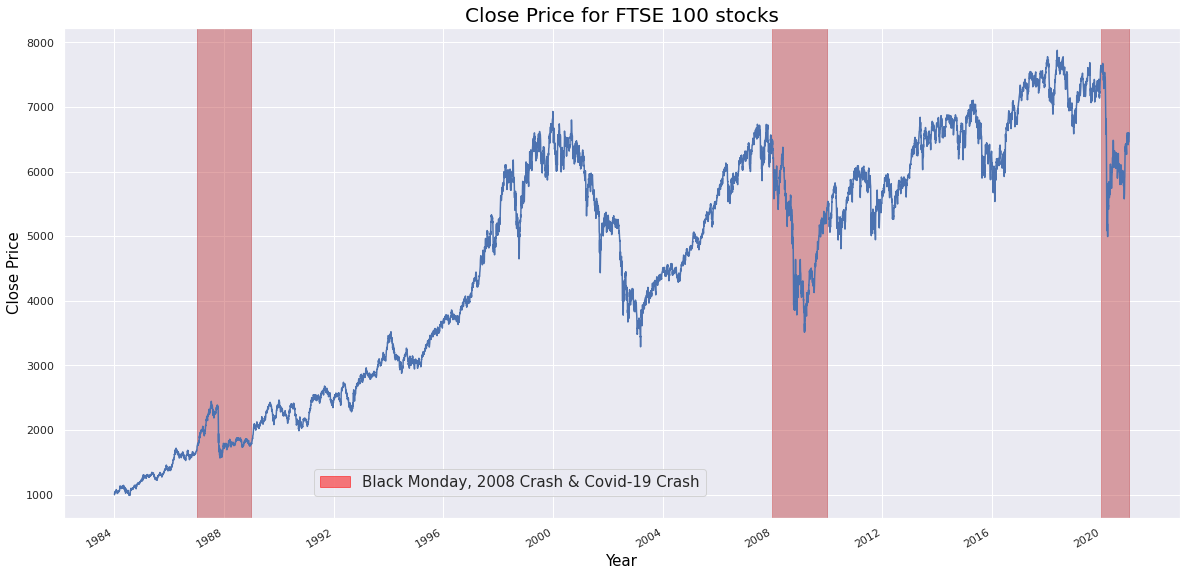

In [ ]:
def ftse100_idx_to_2020_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price', color = 'black', fontsize = 15)
    plt.show();

ftse100_idx_to_2020_plot()

## 5. Data transformation

We need to transform the raw close price data into a format that shows the phenomena we are investigating - average monthly volatility rankings (AMVR).
Volatility is the standard deviation of a stock's annualised returns over a given period and shows the range in which its price may increase or decrease. If the price of a stock fluctuates rapidly in a short period, hitting new highs and lows, it is said to have high volatility.
The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.



### 5.1 Percentage change

We will use the pandas method 'pct_change()' to calculate the daily percentage change directly.

In [ ]:
# To model returns we will use pct_change() to compute the percentage change from the previous row by default.
daily_returns = ftse100_idx_to_2020['Close'].pct_change()
# Drop the first value which becomes a 'NaN' as there is no price change from the day before.
daily_returns.dropna(inplace=True)
# Daily precentage change
daily_returns.head()

Date
1984-01-04    0.001103
1984-01-05    0.017224
1984-01-06    0.012995
1984-01-09    0.005442
1984-01-10   -0.000290
Name: Close, dtype: float64

### 5.2 Resample returns

We will use pandas resample() method to change the frequency of our data from daily to monthly and use standard deviation as
a measure of volatility.

In [ ]:

mnthly_annu = daily_returns.resample('M').std()* np.sqrt(12)
mnthly_annu.head()

Date
1984-01-31    0.030312
1984-02-29    0.029040
1984-03-31    0.036541
1984-04-30    0.027732
1984-05-31    0.036293
Freq: M, Name: Close, dtype: float64

### 5.3 Plot returns

We can plot the annualised monthly volatility to show the major market events. 

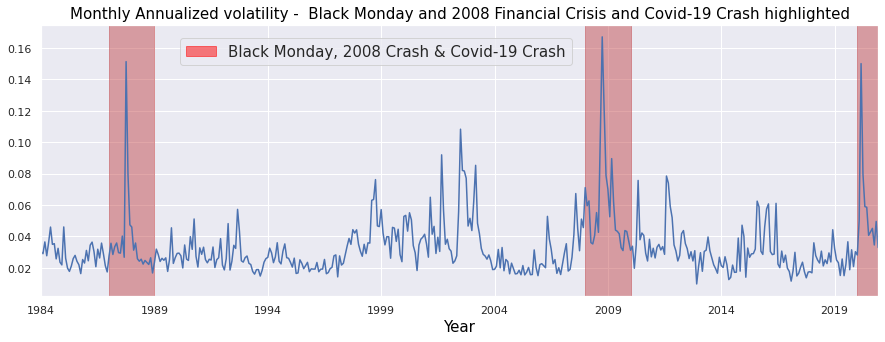

In [ ]:
# We can see the major market events show up in the volatility

def ftse100_idx_to_2020_mnth():
    mnthly_annu.plot(grid = True)
    sns.set(rc={'figure.figsize':(15, 5)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.95), loc='upper center', borderaxespad=0.)
    plt.title('Monthly Annualized volatility -  Black Monday and 2008 Financial Crisis and Covid-19 Crash highlighted', color = 'black', fontsize = 15)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.show()

ftse100_idx_to_2020_mnth()


### 5.4 Calculate Annual Monthly Volatility Rankings (AMVR) metric

We can achieve the AMVR values by applying the pandas groupby() method to the mnthly_annu values and passing in 'mnthly_annu.index.year', which is the year attribute on the datatime index of the mnthly_annu data. 

Next we apply the rank() method, which orders the data in ascending order.

We repeat the process and average over all years for each month to reach the final AMVR values.

In [ ]:
# Group volatility by year and create a ranking for each of the 12 months over all 37 years of data
# for each year rank each month based on volatility lowest=1 highest=12
ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()
# average the ranks over all years for each month
final = ranked.groupby(ranked.index.month).mean()

final.describe()

count    12.000000
mean      6.500000
std       0.504512
min       5.729730
25%       6.121622
50%       6.459459
75%       6.783784
max       7.324324
Name: Close, dtype: float64

In [ ]:
# This gives our final Average Monthly Volatility Rankings. 
# the final average results over 37 years 

final

Date
1     6.729730
2     6.567568
3     7.270270
4     6.135135
5     6.000000
6     6.351351
7     6.864865
8     6.756757
9     6.189189
10    7.324324
11    6.081081
12    5.729730
Name: Close, dtype: float64

Numerically we can see that month 10 (October) is the most volatile and 12 (December) is the least volatile. 

### 5.5 Plot AMVR values

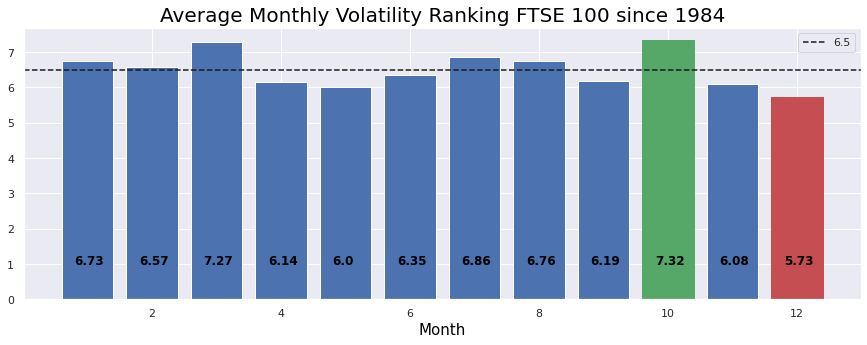

In [ ]:
# Plot results for ranked FTSE 100 volatility

b_plot = plt.bar(x=final.index,height=final)
b_plot[9].set_color('g')
b_plot[11].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking FTSE 100 since 1984', color = 'black', fontsize = 20)
plt.xlabel('Month', color = 'black', fontsize = 15)
plt.legend()
plt.show()

Clearly we can see that October has the highest AMVR and December has the lowest. The mean of 6.5 is also plotted.